Preparamos 

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/lucas/metodos-tp3-master/tpenv/bin/python (found version "3.8.10") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/lucas/metodos-tp3-master
-- Configuring done
-- Genera

In [2]:
import metnum
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, median_absolute_error


!pwd
!python --version

/home/lucas/metodos-tp3-master/notebooks
Python 3.8.10


Importamos los datos

In [3]:
set_original = pd.read_csv("../data/train.csv")
display(set_original)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,119879,bonita casas de 2 recamaras a 10 minutos del c...,vendo casa en bosques de ica residencial a 10 ...,Casa,BOSQUES,Zinacantepec,Edo. de México,0.0,2.0,2.0,...,53666.0,NaN,NaN,2015-02-08 00:00:00,0.0,0.0,0.0,0.0,0.0,650000.0
239996,259178,casa en condominio a 10 min. del centro de toluca,"casa con un jardin amplio, un cuarto de servic...",Casa,Filiberto Navas 325,Toluca,Edo. de México,0.0,3.0,3.0,...,51954.0,19.294665,-99.692916,2014-07-10 00:00:00,0.0,0.0,0.0,1.0,1.0,1940000.0
239997,131932,nicolas san juan,"departamento con excelente ubicación, muy cerc...",Apartamento,Nicolas San Juan,Benito Juárez,Distrito Federal,20.0,2.0,1.0,...,50003995.0,NaN,NaN,2015-03-03 00:00:00,0.0,0.0,0.0,0.0,0.0,3400000.0
239998,146867,casa sola. javier rojo gomez.,"casa sola, dividida en cuatro departamentos de...",Casa,Javier Rojo Gomez 120,Iztapalapa,Distrito Federal,20.0,4.0,0.0,...,24162.0,19.366651,-99.082246,2014-12-26 00:00:00,1.0,0.0,0.0,1.0,1.0,2890000.0


In [4]:
set_original["ciudad"].value_counts()

Querétaro             12646
Benito Juárez         11014
Zapopan               10360
San Luis Potosí        7925
Mérida                 7162
                      ...  
Batopilas                 1
Aramberri                 1
Palizada                  1
Villa Purificación        1
Ahuazotepec               1
Name: ciudad, Length: 875, dtype: int64

Veamos las categorias que tenemos:

In [5]:
list(set_original.columns)

['id',
 'titulo',
 'descripcion',
 'tipodepropiedad',
 'direccion',
 'ciudad',
 'provincia',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'fecha',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'precio']

In [6]:
set_original["precio"].values

array([2273000., 3600000., 1200000., ..., 3400000., 2890000., 3650000.])

## Funciones necesarias:

In [7]:
def CML_KFold(K, X, Y): # K: cortes en kfold ; X : matriz sin la columna de precios ; Y : columna que le falta a X
    cortes = KFold(n_splits=K) #quiero que esta variable tome C cortes
    cortes.get_n_splits(X) #mandamos nuestro X a nuestra variable que toma K  cortes => Sacamos K cortes de X
    
    rmse = []
    rmsle = []
    i = 0
    for iTrain, iTest in cortes.split(X):
        i += 1
        # Separamos train y test
        Xtrain, Xtest = X[iTrain], X[iTest] 
        Ytrain, Ytest = Y[iTrain], Y[iTest]
        print(f"Corte {i}, ")
        
        # Inicializamos el CML con las funciones implementadas en el TP 
        CML = metnum.LinearRegression()
        
        #fiteamos
        CML.fit(Xtrain, Ytrain)
        
        # Predecimos
        pred = CML.predict(Xtest)
        
        # Para evitar errores, vamos a tomar modulo en los precios de pred y Ytest
        Ytest = np.abs(Ytest)
        
        
        pred = np.asarray(pred)
        pred = np.abs(pred)
        
        rmse.append(np.sqrt(mean_squared_error(Ytest, pred)))
        rmsle.append(np.sqrt(mean_squared_log_error(Ytest, pred)))

    print("fin.")
        

    return [rmse,rmsle]

In [8]:
def metricas(Y, pred):
    Y = np.abs(Y)
    pred = np.abs(pred)
    rmse = np.sqrt(mean_squared_error(Y, pred))
    rmsle = np.sqrt(mean_squared_log_error(Y, pred))
    print(f"RMSE = {rmse}")
    print(f"RMSLE = {rmsle}")

In [9]:
def metricasProm(rms):
    rmse = rms[0]
    rmsle = rms[1]
    print(f"RMSE = {(np.mean(rmse), np.std(rmse))}")
    print(f"RMSLE = {(np.mean(rmsle), np.std(rmsle))}")

In [10]:
def cleanOutliers(X,Y,pred,m=2):
    dist = np.abs(Y - pred)
    mean = np.mean(dist)
    std = np.std(dist)
    
    Xclean = []
    Yclean = []
    for i in range(len(Y)):
        if (float(dist[i]) <= float(float(mean) + m * float(std))):
            Xclean.append(X[i])
            Yclean.append(Y[i])
            
    quitados = (len(Y)-len(Yclean))
    print(f"Se han eliminado {quitados}/{len(Y)} outliers. Ahora tienes {len(Yclean)}/{len(Y)}.")
    return [np.asarray(Xclean),np.asarray(Yclean)]

In [11]:
def grafico(X,Y,pred,titulo,ejeX,ejeY,file):
    plt.figure(titulo)
    plt.title(titulo)
    plt.plot(X, Y, "o", label="Datos de test")
    plt.plot(X, pred, "-", label="Ajuste")
    plt.grid()
    plt.legend()
    plt.xlabel(ejeX)
    plt.ylabel(ejeY)
    ruta = str("Imagenes/"+file+".png")
    plt.savefig(ruta)
    plt.show()

In [12]:
def graficoConLim(X,Y,pred,titulo,ejeX,ejeY,file,minX,maxX,minY,maxY):
    plt.figure(titulo)
    plt.title(titulo)
    plt.plot(X, Y, "o", label="Datos de test")
    plt.plot(X, pred, "-", label="Ajuste")
    plt.grid()
    plt.legend()
    plt.xlabel(ejeX)
    plt.ylabel(ejeY)
    plt.xlim(minX,maxX)
    plt.ylim(minY,maxY)
    ruta = str("Imagenes/"+file+".png")
    plt.savefig(ruta)
    plt.show()

# Experimento 1: precio vs metros totales

##### Primero tomaremos una muestra de nuestros datos, esta no debe tener campos invalidos.

In [13]:
#con la seed vamos a siempre tener la misma muestra y con dropna quitamos los elementos invalidos.
# muestra = set_original.sample(random_state=np.random.seed(9), frac=1).dropna() 
muestra = set_original.dropna() #quedan 49881 luego del dropna
muestra = muestra[muestra["tipodepropiedad"] == "Casa"]
#armamos los dos casos
cantidadparatrain = int(len(muestra) - len(muestra)/10)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]

#guardamos las columnas que nos interesan para experimentar
Xtrain, Xtest = train["metrostotales"].values, test["metrostotales"].values
Ytrain, Ytest = train["precio"].values, test["precio"].values

display(train[["id", "metrostotales", "precio"]])
display(test[["id", "metrostotales", "precio"]])

,id,metrostotales,precio
3,209067,67.0,650000.0
7,5013,293.0,4200000.0
12,47890,141.0,1500000.0
16,283945,275.0,2450000.0
31,118889,196.0,1450000.0
...,...,...,...
215989,203737,120.0,950000.0
215993,129024,134.0,880000.0
215995,142411,134.0,1475000.0
216017,218131,128.0,1350000.0


,id,metrostotales,precio
216031,40640,148.0,3600000.0
216058,94957,305.0,4250000.0
216062,47650,140.0,2250000.0
216068,260515,120.0,2738000.0
216072,187996,197.0,1200000.0
...,...,...,...
239989,175203,404.0,3850000.0
239993,207892,150.0,1650000.0
239994,110268,90.0,1350000.0
239996,259178,250.0,1940000.0


In [14]:
29534 + 3282

32816

## Aplicacion algoritmo

### $\underline{Caso 1 :}$ Sin quitar Outtliers

### sin usar kfold

In [15]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

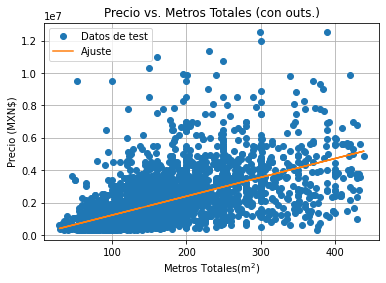

In [16]:
grafico(Xtest,Ytest,pred,"Precio vs. Metros Totales (con outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-precio-simple")

In [17]:
metricas(Ytest,pred)

RMSE = 1301134.7906495698
RMSLE = 0.6068250898136552


### con kfold

In [18]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [19]:
metricasProm(rms)

RMSE = (1279189.6567109574, 45614.55903407656)
RMSLE = (0.6016758506009482, 0.009560525290965662)


### $\underline{Caso 2 :}$  Quitando outtliers

### preparamos los datos

In [20]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 1315/29534 outliers. Ahora tienes 28219/29534.


28219

In [21]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 138/3282 outliers. Ahora tienes 3144/3282.


3144

In [22]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

### sin kfold

In [23]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

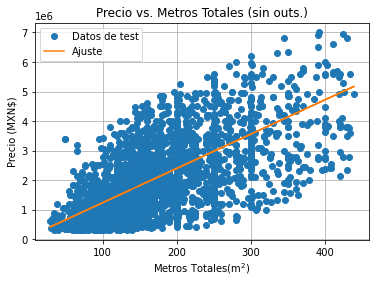

In [24]:
grafico(XtestClean,YtestClean,predClean,"Precio vs. Metros Totales (sin outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-precio-sinout")

In [25]:
metricas(YtestClean,predClean)

RMSE = 924414.4889555972
RMSLE = 0.5685569310023197


### con kfold 

In [26]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [27]:
metricasProm(rmsCleaned)

RMSE = (910139.4845997716, 18072.725394473353)
RMSLE = (0.5416628390495711, 0.009397952259912782)


## Comparando Resultados finales

In [28]:
metricas(Ytest,pred) # sin K-fold sin quitar outs

RMSE = 1301134.7906495698
RMSLE = 0.6068250898136552


In [29]:
metricasProm(rms) # con K-fold sin quitar outs

RMSE = (1279189.6567109574, 45614.55903407656)
RMSLE = (0.6016758506009482, 0.009560525290965662)


In [30]:
metricas(YtestClean,predClean) # sin K-fold quitando outs

RMSE = 924414.4889555972
RMSLE = 0.5685569310023197


In [31]:
metricasProm(rmsCleaned) # con K-fold quitando outs 

RMSE = (910139.4845997716, 18072.725394473353)
RMSLE = (0.5416628390495711, 0.009397952259912782)


# Comencemos a segmentar los datos

# Queretaro:

In [32]:
muestra = set_original
muestra = muestra[muestra["ciudad"] == "Querétaro"]
muestra = muestra[muestra["tipodepropiedad"] == "Casa"]
#armamos los dos casos
cantidadparatrain = int(len(muestra) - len(muestra)/10)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]
tipo = 'metrostotales'
#guardamos las columnas que nos interesan para experimentar
train = train[["id", tipo, "precio"]].dropna()
test = test[["id", tipo, "precio"]].dropna()

Xtrain, Xtest = train[tipo].values, test[tipo].values
Ytrain, Ytest = train["precio"].values, test["precio"].values

display(train[["id", tipo, "precio"]])
display(test[["id", tipo, "precio"]])


,id,metrostotales,precio
12,47890,141.0,1500000.0
16,283945,275.0,2450000.0
19,87655,184.0,1850000.0
48,157857,128.0,1375000.0
61,286113,435.0,6500000.0
...,...,...,...
215724,101277,105.0,1200000.0
215760,128138,169.0,1600000.0
215791,113021,90.0,550000.0
215812,274637,270.0,3900000.0


,id,metrostotales,precio
215836,188622,275.0,2600000.0
215903,216852,160.0,1400000.0
215920,155451,80.0,565000.0
215927,115718,206.0,2330000.0
215986,238720,128.0,900000.0
...,...,...,...
239784,284062,181.0,1890000.0
239872,110687,110.0,1480000.0
239913,133767,114.0,1350000.0
239975,258795,128.0,1275000.0


In [33]:
muestra["metrostotales"].value_counts()

250.0    407
300.0    402
128.0    323
90.0     242
180.0    239
        ... 
426.0      1
378.0      1
37.0       1
434.0      1
382.0      1
Name: metrostotales, Length: 373, dtype: int64

<AxesSubplot:>

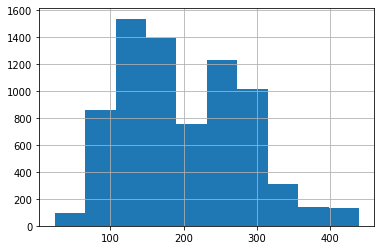

In [34]:
muestra["metrostotales"].hist()

### preparamos los datos

### $\underline{Caso 1 :}$ Sin quitar Outtliers

In [35]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

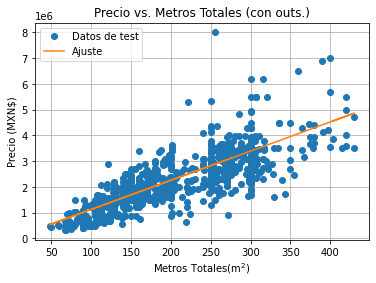

In [36]:
grafico(Xtest,Ytest,pred,"Precio vs. Metros Totales (con outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-precio-quereta-simple")

In [37]:
metricas(Ytest,pred)

RMSE = 681475.9598441432
RMSLE = 0.31984728703033904


### con kfold

In [38]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [39]:
metricasProm(rms)

RMSE = (744336.722823071, 43316.678669348665)
RMSLE = (0.3382320132720499, 0.01258036886382603)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [40]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 259/6721 outliers. Ahora tienes 6462/6721.


6462

In [41]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 31/744 outliers. Ahora tienes 713/744.


713

In [42]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

In [43]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

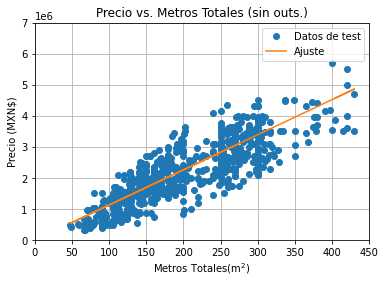

In [44]:
graficoConLim(XtestClean,YtestClean,predClean,"Precio vs. Metros Totales (sin outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-precio-sinout-Querétaro",0,450,0,7000000)

In [45]:
metricas(YtestClean,predClean)

RMSE = 531698.4000697965
RMSLE = 0.29424382738746596


### con Kfold

In [46]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [47]:
metricasProm(rmsCleaned)

RMSE = (553162.2334014225, 14652.395892354663)
RMSLE = (0.3052436100882179, 0.012409308798182759)


### Veremos agregando un feature

#### Agregaremos 'habitaciones' con la idea de mejorar nuestras predicciones

In [48]:
list(set_original.columns)

['id',
 'titulo',
 'descripcion',
 'tipodepropiedad',
 'direccion',
 'ciudad',
 'provincia',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'fecha',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'precio']

In [185]:
muestra = set_original
muestra = muestra[muestra["ciudad"] == "Querétaro"]

muestra = muestra[muestra["tipodepropiedad"] == "Casa"]
#armamos los dos casos


tipo1 = 'metrostotales'
tipo2 = 'metroscubiertos'


#armamos nuevo data frame
nuevaMuestra = pd.DataFrame()
#armamos los dos casos

nuevaMuestra["id"] = muestra["id"]
nuevaMuestra[tipo1+"-"+tipo2] = (muestra[tipo1]) + muestra[tipo2] 
nuevaMuestra["precio"] = muestra["precio"]
             
muestra = nuevaMuestra.dropna()
cantidadparatrain = int(len(muestra)- len(muestra)/10)
from sklearn.utils import shuffle
muestra = shuffle(muestra, random_state=1)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]


#guardamos las columnas que nos interesan para experimentar
train = train[["id",tipo1+"-"+tipo2, "precio"]]
test = test[["id", tipo1+"-"+tipo2, "precio"]]


             

Xtrain, Xtest = train[tipo1+"-"+tipo2].values, test[tipo1+"-"+tipo2].values
Ytrain, Ytest = train["precio"].values, test["precio"].values

display(train[["id", tipo1+"-"+tipo2, "precio"]])
display(test[["id", tipo1+"-"+tipo2, "precio"]])


,id,metrostotales-metroscubiertos,precio
238272,53551,281.0,1500000.0
203547,35691,411.0,2265000.0
60101,263607,600.0,3050000.0
107581,24668,174.0,550000.0
135793,41879,245.0,800000.0
...,...,...,...
191411,148679,694.0,4500000.0
181968,19228,335.0,1450000.0
144736,19197,404.0,2850000.0
25250,122983,388.0,4300000.0


,id,metrostotales-metroscubiertos,precio
155006,147122,180.0,500000.0
174592,72709,338.0,1575000.0
217500,154342,703.0,5500000.0
155839,220908,463.0,2600000.0
165491,190116,515.0,2500000.0
...,...,...,...
29770,76079,440.0,2450000.0
173737,167770,128.0,615000.0
132838,151722,296.0,1830000.0
7745,147600,556.0,3380000.0


In [186]:
muestra[tipo1+"-"+tipo2].value_counts()

500.0    74
360.0    68
340.0    64
570.0    58
400.0    51
         ..
762.0     1
661.0     1
742.0     1
48.0      1
836.0     1
Name: metrostotales-metroscubiertos, Length: 672, dtype: int64

<AxesSubplot:>

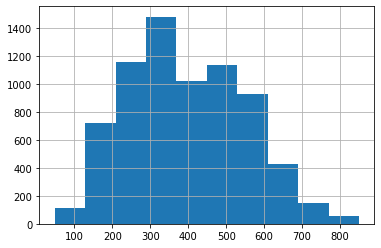

In [187]:
muestra[tipo1+"-"+tipo2].hist()

### preparamos los datos

### $\underline{Caso 1 :}$ Sin quitar Outtliers

In [188]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

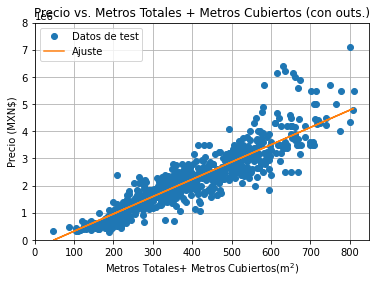

In [190]:
# grafico(Xtest,Ytest,pred,"Precio vs. Metros Totales - Habitaciones (con outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-hab-precio-quereta-simple")
graficoConLim(Xtest,Ytest,pred,"Precio vs. Metros Totales + Metros Cubiertos (con outs.)","Metros Totales+ Metros Cubiertos($\mathrm{m}^2$)","Precio (MXN$)","metros-cub-precio-conout-Querétaro",0,850,0,8*(10**6))

In [54]:
metricas(Ytest,pred)

RMSE = 487696.56033492234
RMSLE = 0.2664363414036497


### con kfold

In [55]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [56]:
metricasProm(rms)

RMSE = (527477.8576118132, 42578.537608618586)
RMSLE = (0.23450053217240585, 0.016765517110720118)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [57]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 233/6480 outliers. Ahora tienes 6247/6480.


6247

In [58]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 30/721 outliers. Ahora tienes 691/721.


691

In [59]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

In [60]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

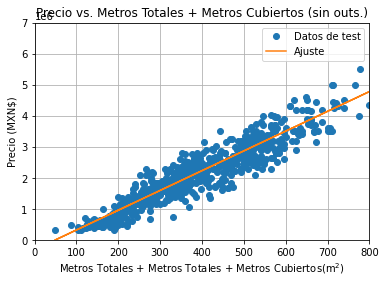

In [61]:
graficoConLim(XtestClean,YtestClean,predClean,"Precio vs. Metros Totales + Metros Cubiertos (sin outs.)","Metros Totales + Metros Totales + Metros Cubiertos($\mathrm{m}^2$)","Precio (MXN$)","metros-cub-precio-sinout-Querétaro",0,800,0,7*(10**6))

In [62]:
metricas(YtestClean,predClean)

RMSE = 362044.165096109
RMSLE = 0.2519459426537217


### con Kfold

In [63]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [64]:
metricasProm(rmsCleaned)

RMSE = (383604.10662268486, 10616.048395457445)
RMSLE = (0.2058521019357435, 0.010001009510621169)


# Zapopan

In [65]:
set_original["ciudad"].value_counts()

Querétaro             12646
Benito Juárez         11014
Zapopan               10360
San Luis Potosí        7925
Mérida                 7162
                      ...  
Batopilas                 1
Aramberri                 1
Palizada                  1
Villa Purificación        1
Ahuazotepec               1
Name: ciudad, Length: 875, dtype: int64

In [179]:
muestra = set_original.dropna() 
muestra = muestra[muestra["ciudad"] == "Zapopan"]
muestra = muestra[muestra["tipodepropiedad"] == "Casa"]

#armamos los dos casos
cantidadparatrain = int(len(muestra) - len(muestra)/10)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]
tipo = 'metrostotales'
#guardamos las columnas que nos interesan para experimentar
train = train[["id", tipo, "precio"]].dropna()
test = test[["id", tipo, "precio"]].dropna()

Xtrain, Xtest = train[tipo].values, test[tipo].values
Ytrain, Ytest = train["precio"].values, test["precio"].values

display(train[["id", tipo, "precio"]])
display(test[["id", tipo, "precio"]])


,id,metrostotales,precio
120,68608,85.0,990000.0
203,144952,90.0,623000.0
234,184145,105.0,1740000.0
298,59017,119.0,2200000.0
361,167542,200.0,2670000.0
...,...,...,...
215983,130196,90.0,1550000.0
216031,40640,148.0,3600000.0
216088,289394,250.0,3290000.0
216093,219864,149.0,2000000.0


,id,metrostotales,precio
216380,152336,220.0,3990000.0
216713,75498,350.0,4950000.0
216733,263619,82.0,695000.0
216750,286031,134.0,1850000.0
216877,248024,140.0,2630000.0
...,...,...,...
239934,37065,250.0,1500000.0
239944,80077,162.0,1780000.0
239964,273538,140.0,2350000.0
239993,207892,150.0,1650000.0


In [180]:
muestra["metrostotales"].value_counts()

90.0     157
140.0     89
80.0      77
200.0     71
105.0     66
        ... 
237.0      1
271.0      1
344.0      1
317.0      1
428.0      1
Name: metrostotales, Length: 308, dtype: int64

<AxesSubplot:>

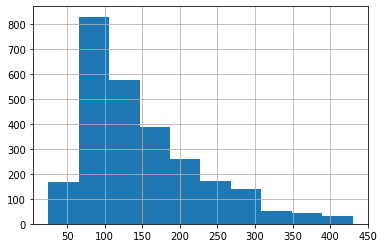

In [181]:
muestra["metrostotales"].hist()

### $\underline{Caso 1 :}$ Sin quitar Outtliers

### preparamos los datos

In [182]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

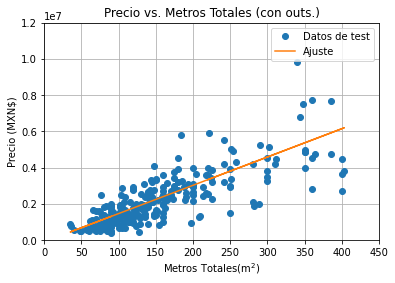

In [183]:
graficoConLim(Xtest,Ytest,pred,"Precio vs. Metros Totales (con outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-precio-guada-simple", 0, 450,0,1.2*10**7)

In [71]:
metricas(Ytest,pred)

RMSE = 894860.0741076745
RMSLE = 0.40315123348607773


### con kfold

In [72]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [73]:
metricasProm(rms)

RMSE = (929740.6714603693, 131114.8786390534)
RMSLE = (0.40457299904619354, 0.03181572598931187)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [74]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 113/2395 outliers. Ahora tienes 2282/2395.


2282

In [75]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 14/267 outliers. Ahora tienes 253/267.


253

In [76]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

### sin kfold

In [77]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

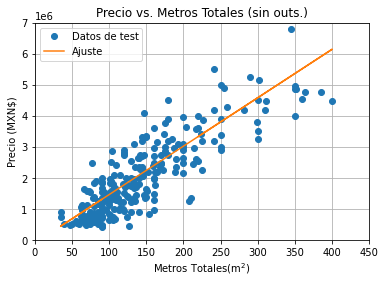

In [78]:
graficoConLim(XtestClean,YtestClean,predClean,"Precio vs. Metros Totales (sin outs.)","Metros Totales($\mathrm{m}^2$)","Precio (MXN$)","metros-precio-guada-sinout",0,450,0,7000000)

In [79]:
metricas(YtestClean,predClean)

RMSE = 660677.5877770792
RMSLE = 0.37871007333024276


In [80]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [81]:
metricasProm(rmsCleaned)

RMSE = (677457.3468540313, 37456.2405461008)
RMSLE = (0.366633015091652, 0.02761864808494033)


### Veremos agregando un feature

#### Agregaremos 'habitaciones' con la idea de mejorar nuestras predicciones

In [82]:
list(set_original.columns)

['id',
 'titulo',
 'descripcion',
 'tipodepropiedad',
 'direccion',
 'ciudad',
 'provincia',
 'antiguedad',
 'habitaciones',
 'garages',
 'banos',
 'metroscubiertos',
 'metrostotales',
 'idzona',
 'lat',
 'lng',
 'fecha',
 'gimnasio',
 'usosmultiples',
 'piscina',
 'escuelascercanas',
 'centroscomercialescercanos',
 'precio']

In [83]:
muestra = set_original
muestra = muestra[muestra["ciudad"] == "Zapopan"]

muestra = muestra[muestra["tipodepropiedad"] == "Casa"]
#armamos los dos casos


tipo1 = 'metrostotales'
tipo2 = 'metroscubiertos'


#armamos nuevo data frame
nuevaMuestra = pd.DataFrame()
#armamos los dos casos

nuevaMuestra["id"] = muestra["id"]
nuevaMuestra[tipo1+"-"+tipo2] = (muestra[tipo1]) + muestra[tipo2] 
nuevaMuestra["precio"] = muestra["precio"]
             
muestra = nuevaMuestra.dropna()
cantidadparatrain = int(len(muestra)- len(muestra)/10)
from sklearn.utils import shuffle
muestra = shuffle(muestra, random_state=1)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]


#guardamos las columnas que nos interesan para experimentar
train = train[["id",tipo1+"-"+tipo2, "precio"]]
test = test[["id", tipo1+"-"+tipo2, "precio"]]


             

Xtrain, Xtest = train[tipo1+"-"+tipo2].values, test[tipo1+"-"+tipo2].values
Ytrain, Ytest = train["precio"].values, test["precio"].values

display(train[["id", tipo1+"-"+tipo2, "precio"]])
display(test[["id", tipo1+"-"+tipo2, "precio"]])


,id,metrostotales-metroscubiertos,precio
148011,296506,560.0,1840000.0
25660,69388,230.0,1160000.0
95040,234020,420.0,2950000.0
57204,51972,247.0,1450000.0
28659,107877,199.0,1200000.0
...,...,...,...
237882,39071,800.0,4200000.0
150986,153452,395.0,3950000.0
237596,143891,525.0,3800000.0
53070,208562,318.0,3210000.0


,id,metrostotales-metroscubiertos,precio
36444,186135,172.0,830000.0
186964,257370,141.0,460000.0
437,38212,335.0,2860000.0
100062,268151,290.0,1680000.0
37986,245450,195.0,985000.0
...,...,...,...
35604,202711,167.0,1150000.0
203197,120241,120.0,525000.0
155100,8513,669.0,3900000.0
8493,180405,646.0,5950000.0


In [84]:
muestra[tipo1+"-"+tipo2].value_counts()

170.0    61
180.0    59
210.0    49
200.0    46
230.0    44
         ..
78.0      1
659.0     1
546.0     1
629.0     1
54.0      1
Name: metrostotales-metroscubiertos, Length: 702, dtype: int64

<AxesSubplot:>

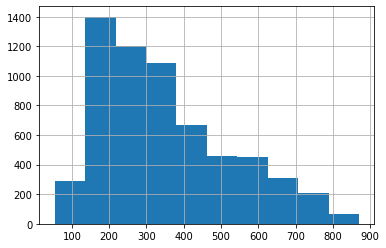

In [85]:
muestra[tipo1+"-"+tipo2].hist()

### preparamos los datos

### $\underline{Caso 1 :}$ Sin quitar Outtliers

In [86]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

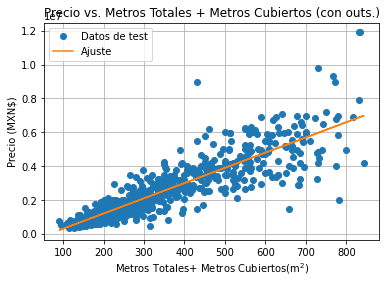

In [87]:
grafico(Xtest,Ytest,pred,"Precio vs. Metros Totales + Metros Cubiertos (con outs.)","Metros Totales+ Metros Cubiertos($\mathrm{m}^2$)","Precio (MXN$)","metros-cub-precio-conout-guada")

In [88]:
metricas(Ytest,pred)

RMSE = 897162.8048825095
RMSLE = 0.31606783843136527


### con kfold

In [89]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [90]:
metricasProm(rms)

RMSE = (919901.3763835784, 66548.67812610466)
RMSLE = (0.3375413200232788, 0.013639317700282117)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [91]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 290/5531 outliers. Ahora tienes 5241/5531.


5241

In [92]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 23/615 outliers. Ahora tienes 592/615.


592

In [93]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

In [94]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

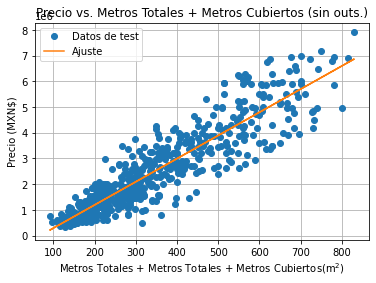

In [95]:
grafico(XtestClean,YtestClean,predClean,"Precio vs. Metros Totales + Metros Cubiertos (sin outs.)","Metros Totales + Metros Totales + Metros Cubiertos($\mathrm{m}^2$)","Precio (MXN$)","metros-cub-precio-sinout-guada")

In [96]:
metricas(YtestClean,predClean)

RMSE = 666962.5856991066
RMSLE = 0.2961965029820637


### con Kfold

In [97]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [98]:
metricasProm(rmsCleaned)

RMSE = (659505.026088392, 16308.910310895924)
RMSLE = (0.3022595873006662, 0.011665661426888654)


# Experimento con palabras


In [99]:
palabras_positivas = ["confort","terraza","mercado","tienda","tiendas","lujo","playa","lujoso","premium","verano","buen","hospital","paisaje","seguro","seguridad","vista","excelente","hospitales","impecable", "grande" ,"plaza", "luminoso", "espaciado" ,  "espacioso" , "bonito" , "tranquilidad" , "preciosa" , "precioso" ]
#


In [100]:
def contadorPalabras(X):
    dict = {}
    columna_palabras = np.array([])
    X = X.dropna()
    for descripcion in (X["descripcion"]):
        cantidad = 0;
        for palabra in palabras_positivas:
            if(palabra in descripcion.lower()):
                if not palabra in dict.keys():
                    dict[palabra] = 0
                dict[palabra] = dict[palabra] +1
                cantidad += 1      
        columna_palabras = np.append(columna_palabras,cantidad)
    return columna_palabras, dict


In [101]:
muestra = set_original.dropna()


muestra = muestra[muestra["ciudad"] == "Puebla"]
columna_palabras, palabras = contadorPalabras(muestra)
nuevaMuestra = pd.DataFrame()
#armamos los dos casos
nuevaMuestra["id"] = muestra["id"]
nuevaMuestra["positivas"] = columna_palabras
nuevaMuestra["precio"] = muestra["precio"]
             
muestra = nuevaMuestra
cantidadparatrain = int(len(muestra) - len(muestra)/10)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]

#guardamos las columnas que nos interesan para experimentar
tipo = 'positivas'
Xtrain, Xtest = train[tipo].values, test[tipo].values
Ytrain, Ytest = train["precio"].values, test["precio"].values

display(train[["id", tipo, "precio"]])
display(test[["id", tipo, "precio"]])

,id,positivas,precio
31,118889,0.0,1450000.0
204,4609,0.0,340000.0
215,62730,2.0,550000.0
563,130927,0.0,1095000.0
919,171647,1.0,2100000.0
...,...,...,...
209783,188719,1.0,1850000.0
209998,229819,2.0,3500000.0
210087,14795,0.0,1190000.0
210487,242863,0.0,2150000.0


,id,positivas,precio
210892,151233,3.0,1700000.0
211244,240899,2.0,3200000.0
211425,255976,1.0,2258739.0
212316,107644,1.0,1730000.0
212537,50727,1.0,2300000.0
...,...,...,...
237799,117235,1.0,1250000.0
237873,89489,0.0,1600000.0
238443,196200,0.0,1000000.0
238752,221165,2.0,1650000.0


In [102]:
print(palabras)
palabras_ordenadas = pd.DataFrame(list(palabras.items()),columns = ['palabras','apariciones']).sort_values('apariciones',ascending=False)

display(palabras_ordenadas)


{'buen': 101, 'excelente': 275, 'terraza': 124, 'plaza': 109, 'tienda': 43, 'tiendas': 41, 'seguridad': 43, 'vista': 76, 'hospital': 17, 'lujo': 42, 'seguro': 9, 'grande': 53, 'bonito': 32, 'mercado': 31, 'preciosa': 40, 'tranquilidad': 6, 'impecable': 9, 'precioso': 7, 'paisaje': 1, 'lujoso': 4, 'hospitales': 11, 'espacioso': 2, 'confort': 3}


,palabras,apariciones
1,excelente,275
2,terraza,124
3,plaza,109
0,buen,101
7,vista,76
11,grande,53
6,seguridad,43
4,tienda,43
9,lujo,42
5,tiendas,41


### preparamos los datos

### $\underline{Caso 1 :}$ Sin quitar Outtliers

### preparamos los datos

In [103]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

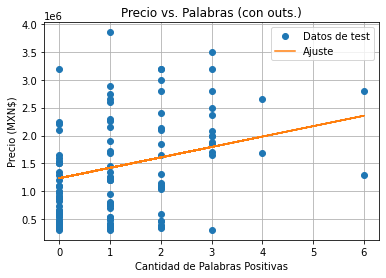

In [104]:
grafico(Xtest,Ytest,pred,"Precio vs. Palabras (con outs.)","Cantidad de Palabras Positivas","Precio (MXN$)","palabras-precio-puebla-simple")

In [105]:
metricas(Ytest,pred)

RMSE = 816186.2878628155
RMSLE = 0.7311133079991825


### con kfold

In [106]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [107]:
metricasProm(rms)

RMSE = (1012166.9547837919, 119383.90022711472)
RMSLE = (0.7314794032498071, 0.03937603787704287)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [108]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 39/1067 outliers. Ahora tienes 1028/1067.


1028

In [109]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 5/119 outliers. Ahora tienes 114/119.


114

In [110]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

### sin kfold

In [111]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

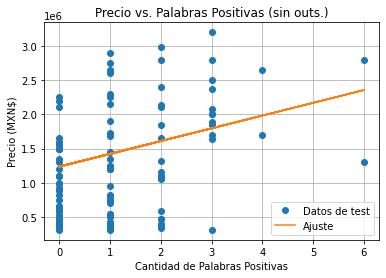

In [112]:
grafico(XtestClean,YtestClean,predClean,"Precio vs. Palabras Positivas (sin outs.)","Cantidad de Palabras Positivas","Precio (MXN$)","metros-palabras-puebla-sinout")

In [113]:
metricas(YtestClean,predClean)

RMSE = 734831.876595433
RMSLE = 0.7274226518855399


In [114]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [115]:
metricasProm(rmsCleaned)

RMSE = (769036.8895191393, 38047.52819839262)
RMSLE = (0.67358875722516, 0.04046470158636131)


###  No llegamos a anda muy significativo con este experimento :(

# Experimento cercania a playa vs precio

### Explicacion:

#### Cercania a playa:
Esta variable es creada al usar la latitud y longitud en el mapa. 
Dentro de un segmento acotado, veremos la distancia de las casas a una linea sobre la costa. A esta linea la llamaremos "linea de playa" y esta sobre el eje y (es decir es vertical). 

#### Objetivo:
Ver si hay relacion entre la distancia a la playa y el precio de las viviendas.

#### Segmento
Acotaremos nuestro set a un conjunto dentro cuatro coordenadas : 
Dentro de este cuadrado estan las casas a analizar.

#### Datos Externos: 
Para este experimento utilizaremos la herramienta Google Maps con el fin de obtener las coordenadas para acotar donde se localizan nuestras viviendas como para elegir la linea de playa.

#### Combinacion de features:
En este experimento combinaremos latitud con longitud para segmentar. 
Luego usaremos solo longitud para aproximarnos a la linea de playa (que es vertical)

In [116]:
muestra = set_original

outliers = list(set(muestra.index[muestra["lng"] > -86.814884].tolist() +
                    muestra.index[muestra["lng"] < -86.931090].tolist() +
                    muestra.index[muestra["lat"] > 21.215653].tolist() +
                    muestra.index[muestra["lat"] < 21.123066].tolist()))
muestra = muestra.drop(labels=outliers, axis=0)
lineaDePlaya = -86.814884

nuevaMuestra = pd.DataFrame()
#armamos los dos casos
nuevaMuestra["id"] = muestra["id"]
nuevaMuestra["playaDist"] = abs(muestra["lng"] - lineaDePlaya) 
nuevaMuestra["precio"] = muestra["precio"]
             
muestra = nuevaMuestra.dropna()
cantidadparatrain = int(len(muestra) - len(muestra)/10)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]

#guardamos las columnas que nos interesan para experimentar
tipo = 'playaDist'
# train = train[["id", tipo, "precio"]].dropna()
# test = test[["id", tipo, "precio"]].dropna()

Xtrain, Xtest = train[tipo].values, test[tipo].values
Ytrain, Ytest = (train["precio"].values), (test["precio"].values)


display(train[["id", tipo, "precio"]])
display(test[["id", tipo, "precio"]])


,id,playaDist,precio
87,166800,0.055982,580000.0
464,261333,0.060407,740000.0
506,219982,0.015024,2350000.0
525,83002,0.070209,580000.0
712,203064,0.007490,3800000.0
...,...,...,...
215602,249964,0.017316,1000000.0
215721,2292,0.019920,3400000.0
215828,179121,0.036010,1650000.0
216006,288904,0.047429,1500000.0


,id,playaDist,precio
216295,229735,0.053530,1859000.0
216313,34096,0.011869,1200000.0
216517,71466,0.013463,3900000.0
216805,38438,0.017301,1500000.0
216977,161313,0.008136,800000.0
...,...,...,...
239130,39711,0.015309,850000.0
239241,95462,0.035090,1350000.0
239424,275987,0.004095,1150000.0
239571,191962,0.027469,1450000.0


### $\underline{Caso 1 :}$ Sin quitar Outtliers

### preparamos los datos

In [117]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

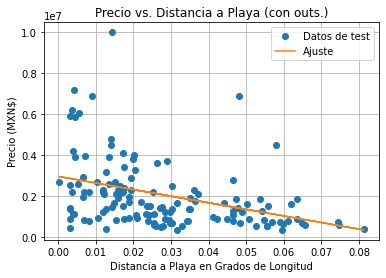

In [118]:

grafico(Xtest,Ytest,pred,"Precio vs. Distancia a Playa (con outs.)","Distancia a Playa en Grados de Longitud","Precio (MXN$)","dist-playa-conouts")


In [119]:
metricas(Ytest,pred)

RMSE = 1496368.532855049
RMSLE = 0.6917912581121234


### con kfold

In [120]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [121]:
metricasProm(rms)

RMSE = (1447568.5756035305, 151716.09232506412)
RMSLE = (0.6860170951548163, 0.05526041279004948)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [122]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 48/1220 outliers. Ahora tienes 1172/1220.


1172

In [123]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 7/136 outliers. Ahora tienes 129/136.


129

In [124]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

### sin kfold

In [125]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

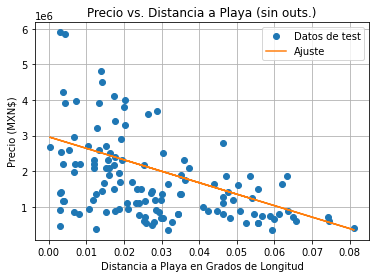

In [126]:
# graficoConLim(XtestClean,YtestClean,predClean,"Precio vs. Distancia a Playa (sin outs.)","Distancia a Playa en Grados de Longitud","Precio (MXN$)","dist-playa-sinouts",0,0.0775,0,7.25*(10**6))

grafico(XtestClean,YtestClean,predClean,"Precio vs. Distancia a Playa (sin outs.)","Distancia a Playa en Grados de Longitud","Precio (MXN$)","dist-playa-sinouts")

In [127]:
metricas(YtestClean,predClean)

RMSE = 1070341.0224434528
RMSLE = 0.6570010793704215


In [128]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [129]:
metricasProm(rmsCleaned)

RMSE = (1021144.2670817323, 64859.58315360529)
RMSLE = (0.60818885724032, 0.051253327564300934)


# Ahora en el conjunto de ciudades

In [131]:


muestra = set_original
outliers = list(set(muestra.index[muestra["lng"] > -97.739773].tolist() +
                    muestra.index[muestra["lng"] < -97.957474].tolist() +
                    muestra.index[muestra["lat"] > 22.428249].tolist() +
                    muestra.index[muestra["lat"] < 22.182782].tolist()))
muestra = muestra.drop(labels=outliers, axis=0)



nuevaMuestra = pd.DataFrame()

#armamos los dos casos
nuevaMuestra["id"] = muestra["id"]

nuevaMuestra["lng"] = muestra["lng"]

nuevaMuestra["lat"] = muestra["lat"]

nuevaMuestra["precio"] = muestra["precio"]
             

muestra = nuevaMuestra.dropna()


columna = []
for row in muestra.itertuples():
    x = row.lng
    y = row.lat
    
    
    dist = distance_to_line(x,y, 22.426650,-97.873558, 22.268221,-97.792669)
    columna.append(dist)
    

cantidadparatrain = int(len(muestra) - len(muestra)/10)

#guardamos las columnas que nos interesan para experimentar
tipo = 'playaDist'
muestra[tipo] = np.asarray(columna)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]


Xtrain, Xtest = train[tipo].values, test[tipo].values
Ytrain, Ytest = train["precio"].values, test["precio"].values


display(train[["id", tipo, "precio"]])
display(test[["id", tipo, "precio"]])

/tmp/ipykernel_155027/2821581340.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muestra[tipo] = np.asarray(columna)


,id,playaDist,precio
22,129818,52.309679,1340000.0
37,1127,52.259156,1280000.0
832,195765,52.323690,1250000.0
853,142112,52.336420,500000.0
1088,280003,52.364643,570000.0
...,...,...,...
217656,212848,52.298194,680000.0
217698,189441,52.260948,640000.0
218013,38488,52.294885,1400000.0
218136,254423,52.381046,500000.0


,id,playaDist,precio
218618,40615,52.370205,5500000.0
218852,97585,52.289412,4000000.0
219802,159162,52.292784,1300000.0
219846,143723,52.306572,4200000.0
219969,11282,52.357278,4600000.0
...,...,...,...
239254,38638,52.348172,1100000.0
239276,259127,52.289683,920000.0
239344,163121,52.312902,3000000.0
239462,19870,52.301057,4900000.0


### $\underline{Caso 1 :}$ Sin quitar Outtliers

In [132]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

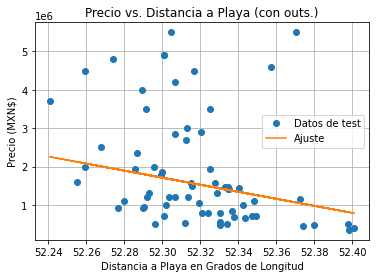

In [133]:

grafico(Xtest,Ytest,pred,"Precio vs. Distancia a Playa (con outs.)","Distancia a Playa en Grados de Longitud","Precio (MXN$)","dist-playa-conouts-ciudades-log")


In [134]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [135]:
metricasProm(rms)

RMSE = (1204916.256149088, 189924.45521741372)
RMSLE = (0.7254819527224753, 0.043881540601693414)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [136]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 28/606 outliers. Ahora tienes 578/606.


578

In [137]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 5/68 outliers. Ahora tienes 63/68.


63

In [138]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

In [139]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

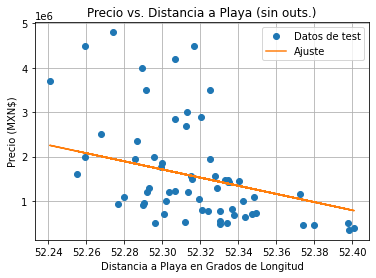

In [140]:
# graficoConLim(XtestClean,YtestClean,predClean,"Precio vs. Distancia a Playa (sin outs.)","Distancia a Playa en Grados de Longitud","Precio (MXN$)","dist-playa-sinouts",0,0.0775,0,7.25*(10**6))

grafico(XtestClean,YtestClean,predClean,"Precio vs. Distancia a Playa (sin outs.)","Distancia a Playa en Grados de Longitud","Precio (MXN$)","dist-playa-sinouts-ciudades-log")

In [141]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [142]:
metricasProm(rmsCleaned)

RMSE = (851099.7679847965, 65448.93782787707)
RMSLE = (0.6458216716523001, 0.03332443527569289)


# EXPERIMENTO HAB GAR BA
#### En este experimento buscamos predecir los metros cubiertos a partir de la combinacion de tres variables: habitaciones, garages,banos.


In [143]:
muestra = set_original
muestra = muestra[muestra["ciudad"] == "Querétaro"]
# muestra = muestra[muestra["tipodepropiedad"] == "Casa"]

#armamos los dos casos


tipo1 = 'habitaciones'
tipo2 = 'garages'
tipo3 = 'banos'

var = 'metroscubiertos'
#armamos nuevo data frame
nuevaMuestra = pd.DataFrame()
#armamos los dos casos

nuevaMuestra["id"] = muestra["id"]
nuevaMuestra[tipo1+"-"+tipo2+"-"+tipo3] = np.abs((muestra[tipo1]) + muestra[tipo2]) + muestra[tipo3]
nuevaMuestra[var] = muestra[var]
             
muestra = nuevaMuestra.dropna()
cantidadparatrain = int(len(muestra)- len(muestra)/10)

muestra = shuffle(muestra, random_state=1)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]


#guardamos las columnas que nos interesan para experimentar
train = train[["id",tipo1+"-"+tipo2+"-"+tipo3, var]]
test = test[["id", tipo1+"-"+tipo2+"-"+tipo3, var]]


             

Xtrain, Xtest = train[tipo1+"-"+tipo2+"-"+tipo3].values, test[tipo1+"-"+tipo2+"-"+tipo3].values
Ytrain, Ytest = train[var].values, test[var].values

display(train[["id", tipo1+"-"+tipo2+"-"+tipo3, var]])
display(test[["id", tipo1+"-"+tipo2+"-"+tipo3, var]])


,id,habitaciones-garages-banos,metroscubiertos
140196,68520,8.0,185.0
214524,139563,7.0,124.0
85507,192567,5.0,59.0
15795,72261,7.0,167.0
183367,43224,9.0,188.0
...,...,...,...
21425,94688,10.0,300.0
211090,72207,7.0,270.0
6610,14292,7.0,120.0
218878,96875,8.0,138.0


,id,habitaciones-garages-banos,metroscubiertos
172978,221842,9.0,209.0
568,81040,8.0,130.0
29493,183489,6.0,171.0
89392,85976,10.0,277.0
191218,210730,4.0,140.0
...,...,...,...
77037,292440,4.0,69.0
207852,237321,7.0,135.0
23881,128012,8.0,260.0
137994,164635,8.0,100.0


In [144]:
muestra[tipo1+"-"+tipo2+"-"+tipo3].value_counts()

7.0     3064
8.0     2060
9.0     1153
6.0      949
5.0      564
4.0      523
10.0     506
11.0     150
3.0       75
12.0       5
2.0        4
15.0       1
17.0       1
13.0       1
Name: habitaciones-garages-banos, dtype: int64

<AxesSubplot:>

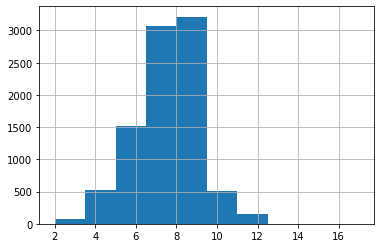

In [145]:
muestra[tipo1+"-"+tipo2+"-"+tipo3].hist()

### preparamos los datos

### $\underline{Caso 1 :}$ Sin quitar Outtliers

In [146]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

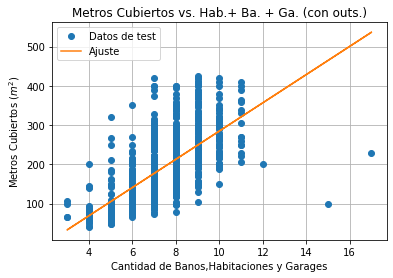

In [147]:
grafico(Xtest,Ytest,pred,"Metros Cubiertos vs. Hab.+ Ba. + Ga. (con outs.)","Cantidad de Banos,Habitaciones y Garages","Metros Cubiertos $(m^2)$","metros-mix-quereta-simple")

In [148]:
metricas(Ytest,pred)

RMSE = 64.5379557706968
RMSLE = 0.3354604988671149


### con kfold

In [149]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [150]:
metricasProm(rms)

RMSE = (59.808370812832074, 1.441813146234634)
RMSLE = (0.33270264677316347, 0.013609256397944199)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [151]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 375/8150 outliers. Ahora tienes 7775/8150.


7775

In [152]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 42/906 outliers. Ahora tienes 864/906.


864

In [153]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

In [154]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

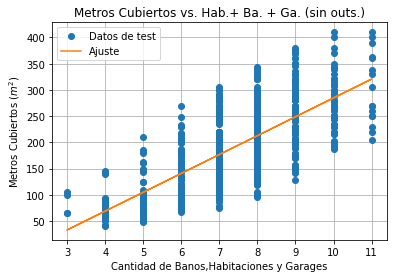

In [155]:
grafico(XtestClean,YtestClean,predClean,"Metros Cubiertos vs. Hab.+ Ba. + Ga. (sin outs.)","Cantidad de Banos,Habitaciones y Garages","Metros Cubiertos $(m^2)$","metros-mix-quereta-sinouts")

In [156]:
metricas(YtestClean,predClean)

RMSE = 52.968502431416816
RMSLE = 0.30664838309399384


### con Kfold

In [157]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [158]:
metricasProm(rmsCleaned)

RMSE = (48.989627777013865, 1.1294568999046715)
RMSLE = (0.2950921147840494, 0.005736041557440621)


## Ahora en Zapopan

In [159]:
muestra = set_original
muestra = muestra[muestra["ciudad"] == "Zapopan"]
# muestra = muestra[muestra["tipodepropiedad"] == "Casa"]

#armamos los dos casos


tipo1 = 'habitaciones'
tipo2 = 'garages'
tipo3 = 'banos'

var = 'metroscubiertos'
#armamos nuevo data frame
nuevaMuestra = pd.DataFrame()
#armamos los dos casos

nuevaMuestra["id"] = muestra["id"]
nuevaMuestra[tipo1+"-"+tipo2+"-"+tipo3] = np.abs((muestra[tipo1]) + muestra[tipo2]) + muestra[tipo3]
nuevaMuestra[var] = muestra[var]
             
muestra = nuevaMuestra.dropna()
cantidadparatrain = int(len(muestra)- len(muestra)/10)

muestra = shuffle(muestra, random_state=1)
train = muestra.iloc[:cantidadparatrain, :]
test = muestra.iloc[cantidadparatrain:, :]


#guardamos las columnas que nos interesan para experimentar
train = train[["id",tipo1+"-"+tipo2+"-"+tipo3, var]]
test = test[["id", tipo1+"-"+tipo2+"-"+tipo3, var]]


             

Xtrain, Xtest = train[tipo1+"-"+tipo2+"-"+tipo3].values, test[tipo1+"-"+tipo2+"-"+tipo3].values
Ytrain, Ytest = train[var].values, test[var].values

display(train[["id", tipo1+"-"+tipo2+"-"+tipo3, var]])
display(test[["id", tipo1+"-"+tipo2+"-"+tipo3, var]])


,id,habitaciones-garages-banos,metroscubiertos
184671,51968,7.0,210.0
198959,179483,6.0,95.0
116006,239758,5.0,108.0
132768,121420,7.0,94.0
200747,272608,6.0,124.0
...,...,...,...
169363,216403,8.0,175.0
136103,3545,7.0,120.0
24479,113656,4.0,69.0
152494,64071,6.0,168.0


,id,habitaciones-garages-banos,metroscubiertos
162955,158446,9.0,310.0
219678,45952,9.0,289.0
147022,21512,6.0,119.0
154406,40597,9.0,398.0
174076,20654,9.0,330.0
...,...,...,...
28641,29394,8.0,187.0
162026,54677,5.0,93.0
125126,66942,8.0,100.0
6774,161022,8.0,310.0


In [160]:
muestra[tipo1+"-"+tipo2+"-"+tipo3].value_counts()

7.0     2182
8.0     1496
4.0      959
6.0      927
9.0      907
5.0      571
10.0     403
11.0     109
3.0       64
12.0      25
2.0        9
13.0       4
14.0       1
Name: habitaciones-garages-banos, dtype: int64

<AxesSubplot:>

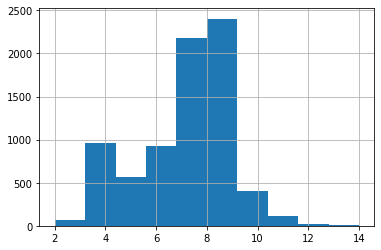

In [161]:
muestra[tipo1+"-"+tipo2+"-"+tipo3].hist()

### preparamos los datos

### $\underline{Caso 1 :}$ Sin quitar Outtliers

In [162]:
#Con Xtrain, e Ytrain entrenamos al algoritmo
regresion = metnum.LinearRegression()
regresion.fit(Xtrain, Ytrain)
#Ahora predeciremos Ytest en pred, usando Xtest
pred = regresion.predict(Xtest)
pred = pred.reshape(pred.shape[0])

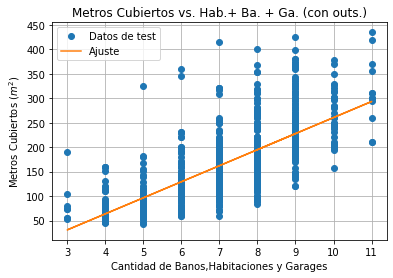

In [163]:
grafico(Xtest,Ytest,pred,"Metros Cubiertos vs. Hab.+ Ba. + Ga. (con outs.)","Cantidad de Banos,Habitaciones y Garages","Metros Cubiertos $(m^2)$","metros-mix-zapo-simple")

In [164]:
metricas(Ytest,pred)

RMSE = 55.23569863422196
RMSLE = 0.3398763978631059


### con kfold

In [165]:
rms = CML_KFold(10, Xtrain, Ytrain)

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [166]:
metricasProm(rms)

RMSE = (57.87887455597971, 1.9066565976591707)
RMSLE = (0.3700102694015531, 0.01959548419072206)


## $\underline{Caso 2 :}$ Quitando Outtliers

In [167]:
# Limpiamos los train
Ytrain_pred = regresion.predict(Xtrain)
Ytrain_pred = Ytrain_pred.reshape(Ytrain_pred.shape[0])

trainCleaned = cleanOutliers(Xtrain,Ytrain,Ytrain_pred,m=2)
len(trainCleaned[0])

Se han eliminado 332/6891 outliers. Ahora tienes 6559/6891.


6559

In [168]:
# limpiamos los test
testCleaned = cleanOutliers(Xtest,Ytest,pred,m=2)
len(testCleaned[0])

Se han eliminado 33/766 outliers. Ahora tienes 733/766.


733

In [169]:
XtestClean = testCleaned[0]
YtestClean = testCleaned[1]

XtrainClean = trainCleaned[0]
YtrainClean = trainCleaned[1]

In [170]:
#Con XtrainClean, e YtrainClean entrenamos al algoritmo
regresionClean = metnum.LinearRegression()
regresionClean.fit(XtrainClean, YtrainClean)
#Ahora predeciremos Ytest en pred, usando Xtest
predClean = regresion.predict(XtestClean)
predClean = predClean.reshape(predClean.shape[0])

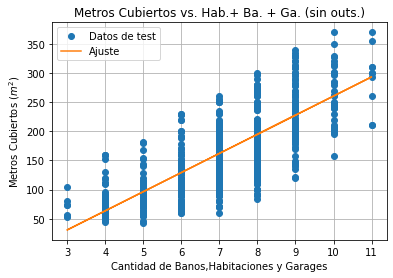

In [171]:
grafico(XtestClean,YtestClean,predClean,"Metros Cubiertos vs. Hab.+ Ba. + Ga. (sin outs.)","Cantidad de Banos,Habitaciones y Garages","Metros Cubiertos $(m^2)$","metros-mix-zapo-sinout")

In [172]:
metricas(YtestClean,predClean)

RMSE = 44.99173574896128
RMSLE = 0.31501847486518847


### con Kfold

In [173]:

rmsCleaned = CML_KFold(10, XtrainClean, YtrainClean) 

Corte 1, 
Corte 2, 
Corte 3, 
Corte 4, 
Corte 5, 
Corte 6, 
Corte 7, 
Corte 8, 
Corte 9, 
Corte 10, 
fin.


In [174]:
metricasProm(rmsCleaned)

RMSE = (45.53792758768803, 0.9593573633568193)
RMSLE = (0.3120491069937251, 0.01663208124819436)
